In [55]:
from scipy.integrate import quad
import matplotlib.pyplot as plt
import numpy as np
import math

In [56]:
nw = 1


def func1(t, A=2): 
    if t % 2 < 1:
        return A/2
    return -A/2

func = func1

def my_cos(xi):
    global nw
    return func(xi) * math.cos(nw * xi)

def my_sin(xi):
    global nw
    return func(xi) * math.sin(nw * xi)


def a_n(t0, n, T=2):
  w= 2*math.pi/T
  an = (2/T) * quad(my_cos, t0, t0+T)[0]
  return an

def b_n(t0, n, T=2):
  bn= (2/T) * quad(my_sin, t0, t0+T)[0]
  return bn


def Furie(t0, T=2):
  global nw
  a0 = (2/T) * quad(func, t0, t0+T)[0]
  sm = a0/2
  for n in np.arange(1, 10):
    nw = 2 * n * math.pi / T
    an = a_n(t0, n) * math.cos(nw*t0)
    bn = b_n(t0, n) * math.sin(nw*t0)
    sm += an + bn
  return sm

C:\Users\4xev4\AppData\Local\Temp\ipykernel_18348\2845164153.py:32: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  a0 = (2/T) * quad(func, t0, t0+T)[0]
C:\Users\4xev4\AppData\Local\Temp\ipykernel_18348\2845164153.py:22: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling t

<function matplotlib.pyplot.show(close=None, block=None)>

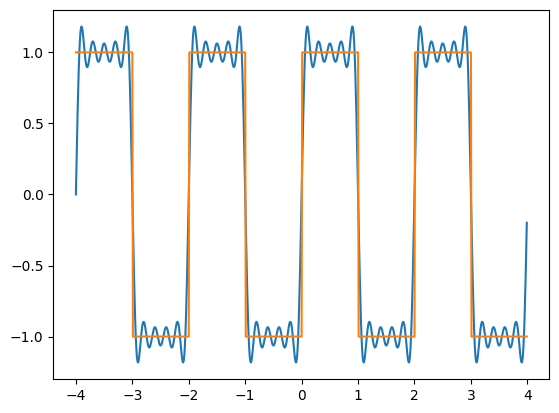

In [57]:
t = np.arange(-4, 4, 0.01)
f = [func(ti)  for ti in t]  # func
F = [Furie(ti) for ti in t]  # Furie

plt.plot(t, F)
plt.plot(t, f)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

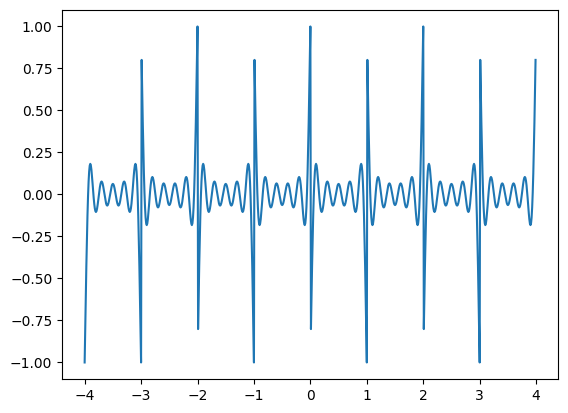

In [58]:
err = [Fi-fi for Fi, fi in zip(F, f)]
plt.plot(t, err)
plt.show

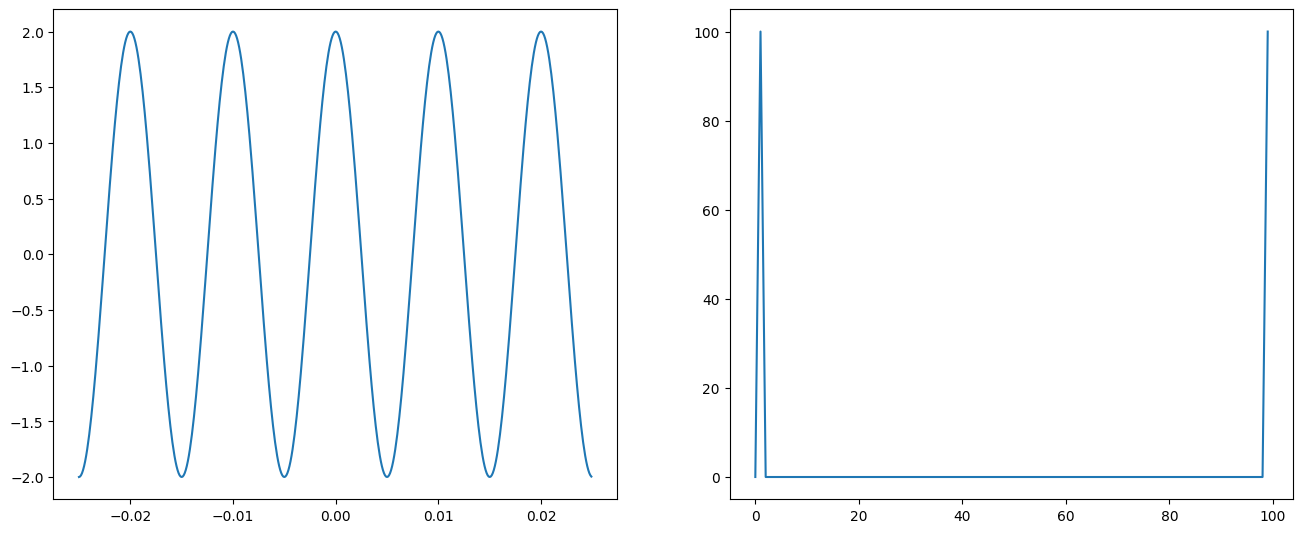

In [59]:
fig = plt.figure(figsize=(16, 14))

A = 2
f = 100
w = 2 * math.pi * f

tt = np.arange(-0.025, 0.025, 0.0001)
Acos_wt = A * np.cos(w*tt)

# Acos_wt_T = Acos_wt[0: 100]

spectr = np.fft.fft(Acos_wt_T)

plt.subplot(221)
plt.plot(tt, Acos_wt)

plt.subplot(222)
plt.plot(abs(spectr))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

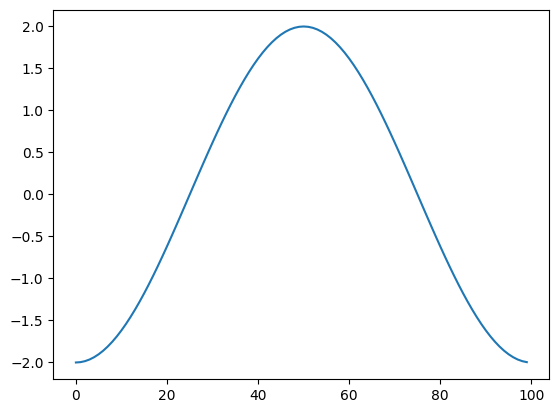

In [70]:
spectr = np.fft.fft(Acos_wt_T)
a = np.fft.ifft(spectr)
plt.plot(a)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

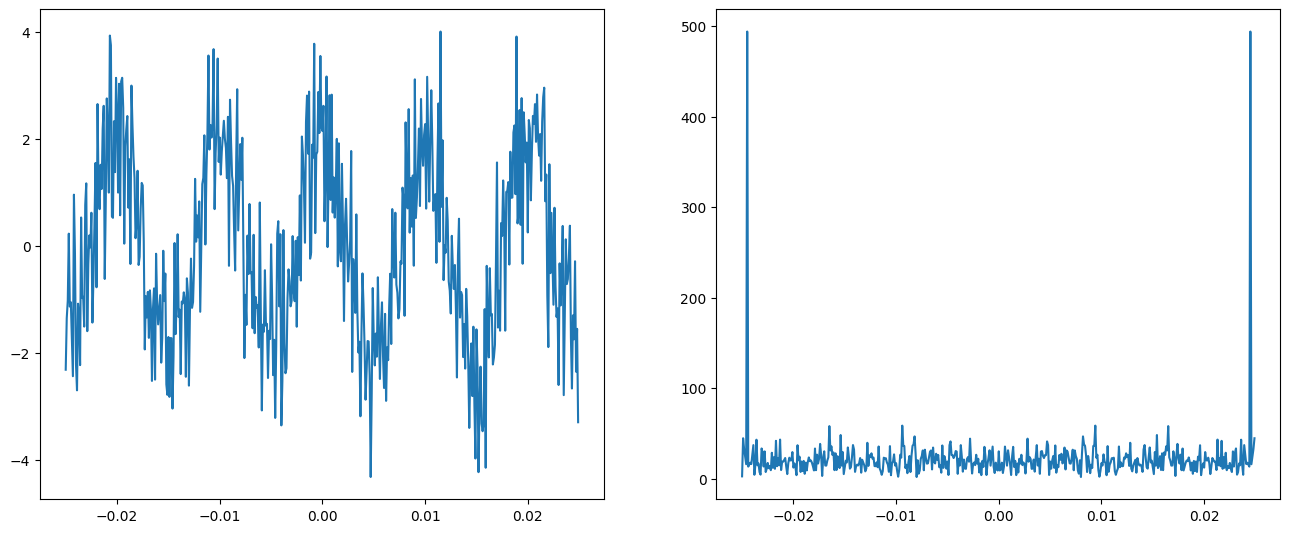

In [61]:
fig = plt.figure(figsize=(16, 14))

noise = np.random.normal(0, 1, Acos_wt.shape)
s = noise + Acos_wt
plt.subplot(221)
plt.plot(tt, s)

abc = np.fft.fft(s)
plt.subplot(222)
plt.plot(tt, abs(abc))
plt.show